In [ ]:
Week 2:

#The GapMinder dataset which I'm inspecting has just a single straight out factor: polity score, a measure of a nation's democratic tendencies. There are 21 different categories, ranging from -10 to +10 I binned the data into Low (-10 to -4), Mid (-3 to +3), and High (+3 to +10) to increase the number of data points in each category and reduce the need for post hoc comparisons. However, I require a second categorical variable with only two categories to conduct a chi-square test. Since my base inquiry is to analyze web use rates, I chose to container this information into two canisters: Low and High, and afterward play out a chi-square trial of freedom followed by post hoc tests.

In [57]:
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
 
data = pd.read_csv('C:/Users/Shubhranil Mazumder/Downloads/gapminder.csv', low_memory=False)

In [58]:
data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['polityscore'] = pd.to_numeric(data['polityscore'], errors='coerce')
 
sub1 = data.copy()

In [59]:
sub3 = sub1[['internetuserate', 'polityscore']].dropna()
sub3['polityscore_binned'] = pd.cut(sub3.polityscore, 3, labels=['Low', 'Mid', 'High'])
sub3['internetuserate_binned'] = pd.cut(sub3.internetuserate, 2, labels=['Low', 'High'])

sub4 = sub3.copy()

In [60]:
ct1 = pd.crosstab(sub4['internetuserate_binned'], sub4['polityscore_binned'])
ct1

polityscore_binned,Low,Mid,High
internetuserate_binned,,,
Low,23,27,62
High,5,1,37


In [61]:
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
colpct

polityscore_binned,Low,Mid,High
internetuserate_binned,,,
Low,0.821429,0.964286,0.626263
High,0.178571,0.035714,0.373737


In [62]:
cs1= scipy.stats.chi2_contingency(ct1)
cs1

(14.106815515141927,
 0.0008644580686778272,
 2,
 array([[20.23225806, 20.23225806, 71.53548387],
        [ 7.76774194,  7.76774194, 27.46451613]]))

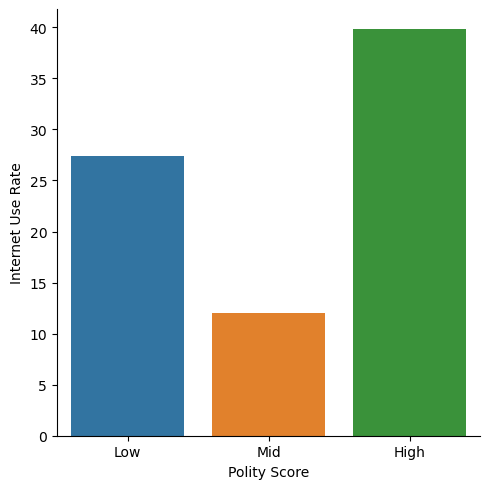

In [63]:
sns.catplot(x="polityscore_binned", y="internetuserate", data=sub4, kind="bar", ci=None)
plt.xlabel('Polity Score')
plt.ylabel('Internet Use Rate')
plt.show()

In [8]:
recode1 = {'Low': 'Low', 'Mid': 'Mid'}
sub4['COMP-Low-v-Mid']= sub4['polityscore_binned'].map(recode1)

In [9]:
ct2=pd.crosstab(sub4['internetuserate_binned'], sub4['COMP-Low-v-Mid'])
ct2

COMP-Low-v-Mid,Low,Mid
internetuserate_binned,,
Low,23,27
High,5,1


In [10]:
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
colpct

COMP-Low-v-Mid,Low,Mid
internetuserate_binned,,
Low,0.821429,0.964286
High,0.178571,0.035714


In [11]:
cs2= scipy.stats.chi2_contingency(ct2)
cs2

(1.68,
 0.19492445251365376,
 1,
 array([[25., 25.],
        [ 3.,  3.]]))

In [12]:
recode2 = {'Low': 'Low', 'High': 'High'}
sub4['COMP-Low-v-High']= sub4['polityscore_binned'].map(recode2)

In [13]:
ct3=pd.crosstab(sub4['internetuserate_binned'], sub4['COMP-Low-v-High'])
ct3

COMP-Low-v-High,High,Low
internetuserate_binned,,
Low,62,23
High,37,5


In [14]:
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
colpct

COMP-Low-v-High,High,Low
internetuserate_binned,,
Low,0.626263,0.821429
High,0.373737,0.178571


In [15]:
cs3= scipy.stats.chi2_contingency(ct3)
cs3

(2.9260991012566637,
 0.08715785476442026,
 1,
 array([[66.25984252, 18.74015748],
        [32.74015748,  9.25984252]]))

In [16]:
recode3 = {'Mid': 'Mid', 'High': 'High'}
sub4['COMP-Mid-v-High']= sub4['polityscore_binned'].map(recode3)

In [17]:
ct4=pd.crosstab(sub4['internetuserate_binned'], sub4['COMP-Mid-v-High'])
ct4

COMP-Mid-v-High,High,Mid
internetuserate_binned,,
Low,62,27
High,37,1


In [18]:
colsum=ct4.sum(axis=0)
colpct=ct4/colsum
colpct

COMP-Mid-v-High,High,Mid
internetuserate_binned,,
Low,0.626263,0.964286
High,0.373737,0.035714


In [19]:
cs4= scipy.stats.chi2_contingency(ct4)
cs4

(10.33624298979488,
 0.00130443250866551,
 1,
 array([[69.37795276, 19.62204724],
        [29.62204724,  8.37795276]]))